In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the dataset

In [2]:
df=pd.read_csv('titanic_dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.describe(include =object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Data Preprocessing

In [10]:
df=df.set_index('PassengerId')

In [11]:
#checking null values
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

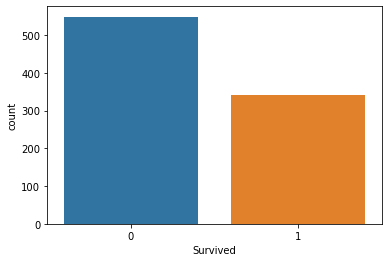

In [12]:
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

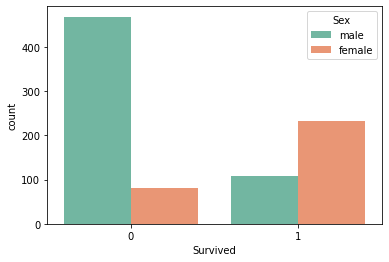

In [13]:
sns.countplot(x='Survived',hue='Sex',data=df,palette="Set2")

<AxesSubplot:xlabel='Survived', ylabel='count'>

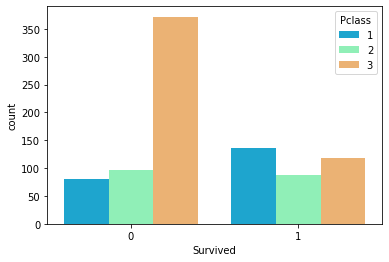

In [14]:
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

<AxesSubplot:>

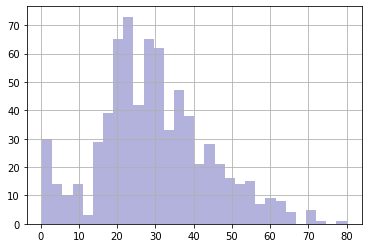

In [15]:
df['Age'].hist(bins=30,color='darkblue',alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

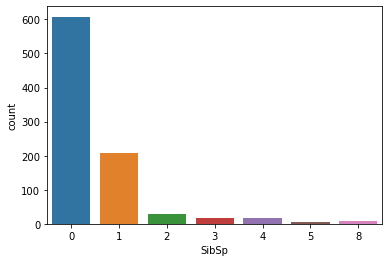

In [16]:
sns.countplot(x='SibSp',data=df)

<AxesSubplot:>

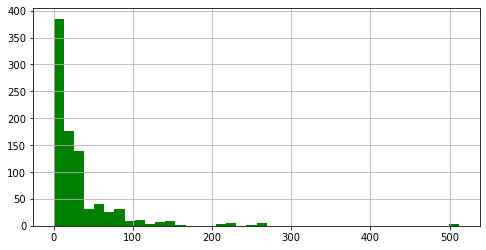

In [17]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

### Data Cleaning

We want to fill in missing age data. One way to do this is by filling in the mean age of all the passengers.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

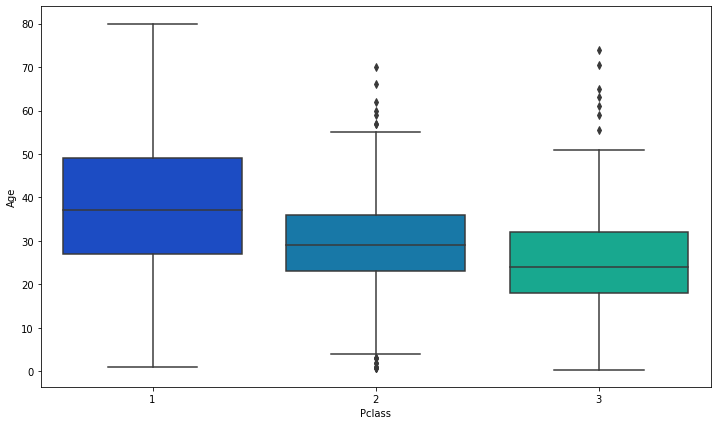

In [18]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older. We'll use these average age values to impute based on Pclass for Age.

In [19]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
            
        return Age

In [20]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [21]:
df['Age'].isna().sum()

0

In [22]:
df.drop('Cabin',axis=1,inplace=True) # dropping cabin column 

In [23]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].ffill())

In [24]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### Handling outliers

Survived        AxesSubplot(0.125,0.71587;0.352273x0.16413)
Pclass       AxesSubplot(0.547727,0.71587;0.352273x0.16413)
Age            AxesSubplot(0.125,0.518913;0.352273x0.16413)
SibSp       AxesSubplot(0.547727,0.518913;0.352273x0.16413)
Parch          AxesSubplot(0.125,0.321957;0.352273x0.16413)
Fare        AxesSubplot(0.547727,0.321957;0.352273x0.16413)
dtype: object

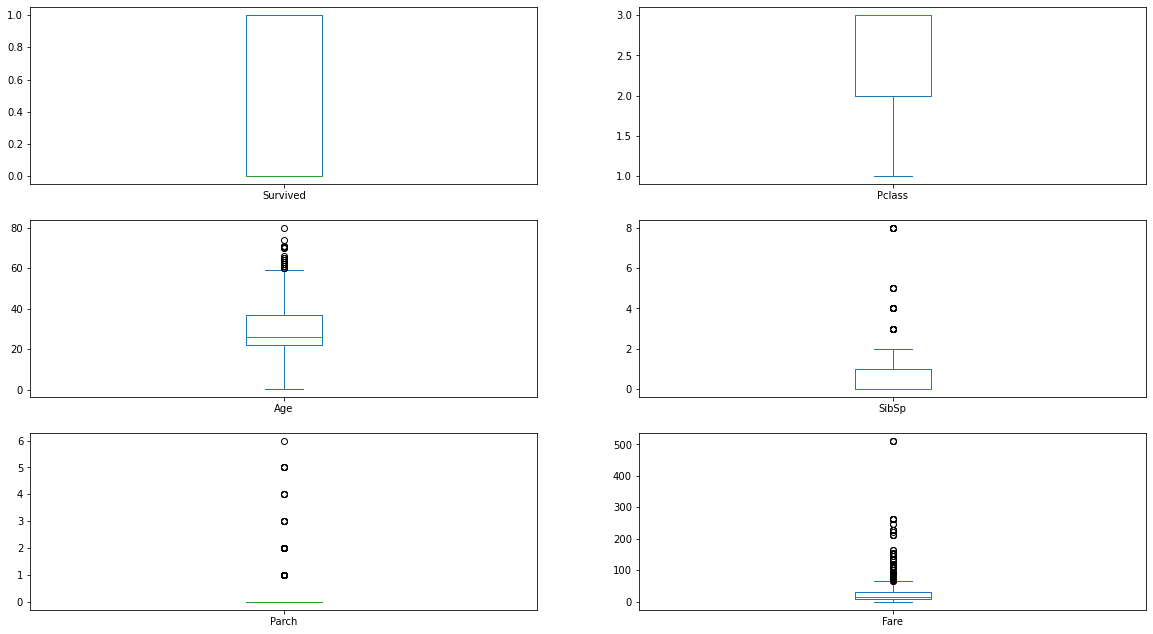

In [25]:
df.plot(kind='box',subplots=True,layout=(4,2),figsize=(20,15))

In [26]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [27]:
col=['Age', 'SibSp', 'Parch', 'Fare']

In [28]:
for x in col:
 Q1= np.percentile(df[x],25, interpolation='midpoint')
 Q2= np.percentile(df[x],50, interpolation='midpoint')
 Q3= np.percentile(df[x],75, interpolation='midpoint')
 IQR= Q3-Q1
 low_lim = Q1-1.5*IQR
 upp_lim = Q3+1.5*IQR
 ind1 = df[x]<low_lim
 df.drop(df.loc[ind1].index,inplace= True)
 ind2 = df[x]>upp_lim
 df.drop(df.loc[ind2].index,inplace= True)

### Converting Categorical Features

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  573 non-null    int64  
 1   Pclass    573 non-null    int64  
 2   Name      573 non-null    object 
 3   Sex       573 non-null    object 
 4   Age       573 non-null    float64
 5   SibSp     573 non-null    int64  
 6   Parch     573 non-null    int64  
 7   Ticket    573 non-null    object 
 8   Fare      573 non-null    float64
 9   Embarked  573 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 49.2+ KB


In [30]:
df.nunique()

Survived      2
Pclass        3
Name        573
Sex           2
Age          61
SibSp         3
Parch         1
Ticket      531
Fare        145
Embarked      3
dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Embarked']= le.fit_transform(df['Embarked'])

In [32]:
df=pd.get_dummies(df,columns=['Sex'],drop_first=True)

In [33]:
df.drop(['Name','Ticket'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
PassengerId,,,,,,,,
1,0,3,22.0,1,0,7.2500,2,1
3,1,3,26.0,0,0,7.9250,2,0
4,1,1,35.0,1,0,53.1000,2,0
5,0,3,35.0,0,0,8.0500,2,1
6,0,3,24.0,0,0,8.4583,1,1


### Building the models

splitting our data into a training set and test set

### Train Test Split

In [36]:
X=df.drop('Survived',axis=1)

In [37]:
X.shape

(573, 7)

In [38]:
y=df['Survived']

In [39]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X= sc.fit_transform(X)
X= pd.DataFrame(X)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

### Gaussian Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [48]:
ypred = clf.predict(X_test)
confusion_matrix(ypred, y_test), f1_score(ypred, y_test)

(array([[98, 20],
        [22, 32]], dtype=int64),
 0.6037735849056604)

In [50]:
accuracy_gnb= accuracy_score(y_test,ypred)*100
accuracy_gnb

75.5813953488372

### Bernoulli naive bayes

In [51]:
from sklearn.naive_bayes import BernoulliNB
ber= BernoulliNB()
bmodel= ber.fit(X_train,y_train)
y_pred= bmodel.predict(X_test)

In [52]:
accuracy_ber= accuracy_score(y_test,y_pred)*100
f1_ber=f1_score(y_test,y_pred)*100
confusion_matrix(y_test, y_pred)

array([[107,  13],
       [ 26,  26]], dtype=int64)

In [53]:
accuracy_ber

77.32558139534885

In [54]:
f1_ber

57.14285714285715

### Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc_model=rfc.fit(X_train,y_train)
y_pred_rfc=rfc_model.predict(X_test)

In [56]:
f1_rfc=f1_score(y_test, y_pred_rfc)*100
f1_rfc

61.702127659574465

In [57]:
acc_rfc= accuracy_score(y_test, y_pred_rfc)*100
acc_rfc

79.06976744186046

### Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [59]:
pred = logmodel.predict(X_test)

In [70]:
pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [71]:
accuracy=accuracy_score(y_test,pred)*100
accuracy

79.06976744186046

In [72]:
confusion_matrix(y_test,pred)

array([[109,  11],
       [ 25,  27]], dtype=int64)

### Decision Tree Classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier
dec= DecisionTreeClassifier()
dec.fit(X_train,y_train)
y_pred_decc = dec.predict(X_test)

In [74]:
f1_dt=f1_score(y_test, y_pred_decc)*100
f1_dt

54.347826086956516

In [75]:
acc_dt= accuracy_score(y_test, y_pred_decc)*100
acc_dt

75.5813953488372